# Librerías

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de los datos

In [3]:
# Primero se leen los datos y se guardan como un dataframe

# Define los nombres de las columnas que quieres
columnas = ["ID", "Diagnosis", "Radius1", "Texture1", "Perimeter1", "Area1", "Smoothness1", "Compactness1", "Concavity1", "Concave_points1", "Symmetry1", "Fractal_dimension1", "Radius2", "Texture2", "Perimeter2", "Area2", "Smoothness2", "Compactness2", "Concavity2", "Concave_points2", "Symmetry2", "Fractal_dimension2", "Radius3", "Texture3", "Perimeter3", "Area3", "Smoothness3", "Compactness3", "Concavity3", "Concave_points3", "Symmetry3", "Fractal_dimension3"]

df = pd.read_csv("breast+cancer+wisconsin+diagnostic\wdbc.data", header=None, names=columnas)

# Muestra el DataFrame
pd.set_option('display.max_rows', None)
df.head(5)


,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Características de los datos

In [4]:
# Se observn los tipos de los datos, número de nulos y la cantidad de observaciones, así como el número de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   Radius1             569 non-null    float64
 3   Texture1            569 non-null    float64
 4   Perimeter1          569 non-null    float64
 5   Area1               569 non-null    float64
 6   Smoothness1         569 non-null    float64
 7   Compactness1        569 non-null    float64
 8   Concavity1          569 non-null    float64
 9   Concave_points1     569 non-null    float64
 10  Symmetry1           569 non-null    float64
 11  Fractal_dimension1  569 non-null    float64
 12  Radius2             569 non-null    float64
 13  Texture2            569 non-null    float64
 14  Perimeter2          569 non-null    float64
 15  Area2               569 non-null    float64
 16  Smoothne

In [5]:
# Como todas las variables tienen el mismo número de variables que el total, se deduce que no existen duplicados.
# De todas formas se comprueba
df[df.duplicated()]

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3


# Transformaciones de los datos

In [6]:
# Al ser el objetivo una clasificación binaria, se traducen la variable a clasificar a 1(si es maligno) y 0(si es benigno)

df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [7]:
import pandas as pd
import re

# Creamos una copia para no modificar el original
df_d = df.copy()

# Lista de raíces comunes
variables_comunes = [
    "Radius", "Texture", "Perimeter", "Area", "Smoothness",
    "Compactness", "Concavity", "Concave_points",
    "Symmetry", "Fractal_dimension"
]

for variable in variables_comunes:
    columnas_grupo = [col for col in df_d.columns if re.match(f"{variable}[123]$", col)]
    
    if columnas_grupo:
        # Crear nueva columna con la media
        df_d[variable] = df_d[columnas_grupo].mean(axis=1)
        
        # Eliminar las columnas originales
        df_d.drop(columns=columnas_grupo, inplace=True)


In [8]:
df_d.head(5)

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,842302,1,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,842517,1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,84300903,1,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,84348301,1,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,84358402,1,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908


In [9]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 569 non-null    int64  
 1   Diagnosis          569 non-null    int64  
 2   Radius             569 non-null    float64
 3   Texture            569 non-null    float64
 4   Perimeter          569 non-null    float64
 5   Area               569 non-null    float64
 6   Smoothness         569 non-null    float64
 7   Compactness        569 non-null    float64
 8   Concavity          569 non-null    float64
 9   Concave_points     569 non-null    float64
 10  Symmetry           569 non-null    float64
 11  Fractal_dimension  569 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 53.5 KB


# Estudio estadístico

In [20]:
# Se observan las principales métricas estadísticas
pd.set_option('display.max_columns', None)
df_d.describe()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,10.267218,15.394575,67.365435,525.269770,0.078590,0.128028,0.130961,0.058441,0.163927,0.050179
std,1.250206e+08,0.483918,2.830934,3.486592,19.647999,316.599021,0.012095,0.072630,0.101034,0.035419,0.029104,0.008570
min,8.670000e+03,0.000000,5.045033,7.378800,31.917667,112.844333,0.047461,0.018651,0.000000,0.000000,0.094163,0.036039
25%,8.692180e+05,0.000000,8.354500,12.754333,54.030333,319.813333,0.070515,0.076657,0.053593,0.031523,0.144790,0.044183
50%,9.060240e+05,0.000000,9.567567,15.175000,62.294333,422.976667,0.078969,0.110533,0.107500,0.049157,0.160107,0.048260
75%,8.813129e+06,1.000000,11.692433,17.540767,77.393000,627.163333,0.085913,0.166953,0.184610,0.084833,0.178193,0.054146
max,9.113205e+08,1.000000,22.002333,28.335367,152.250000,2432.400000,0.121241,0.456590,0.622933,0.166033,0.327710,0.100003


# Estudio descriptivo

## Correlaciones

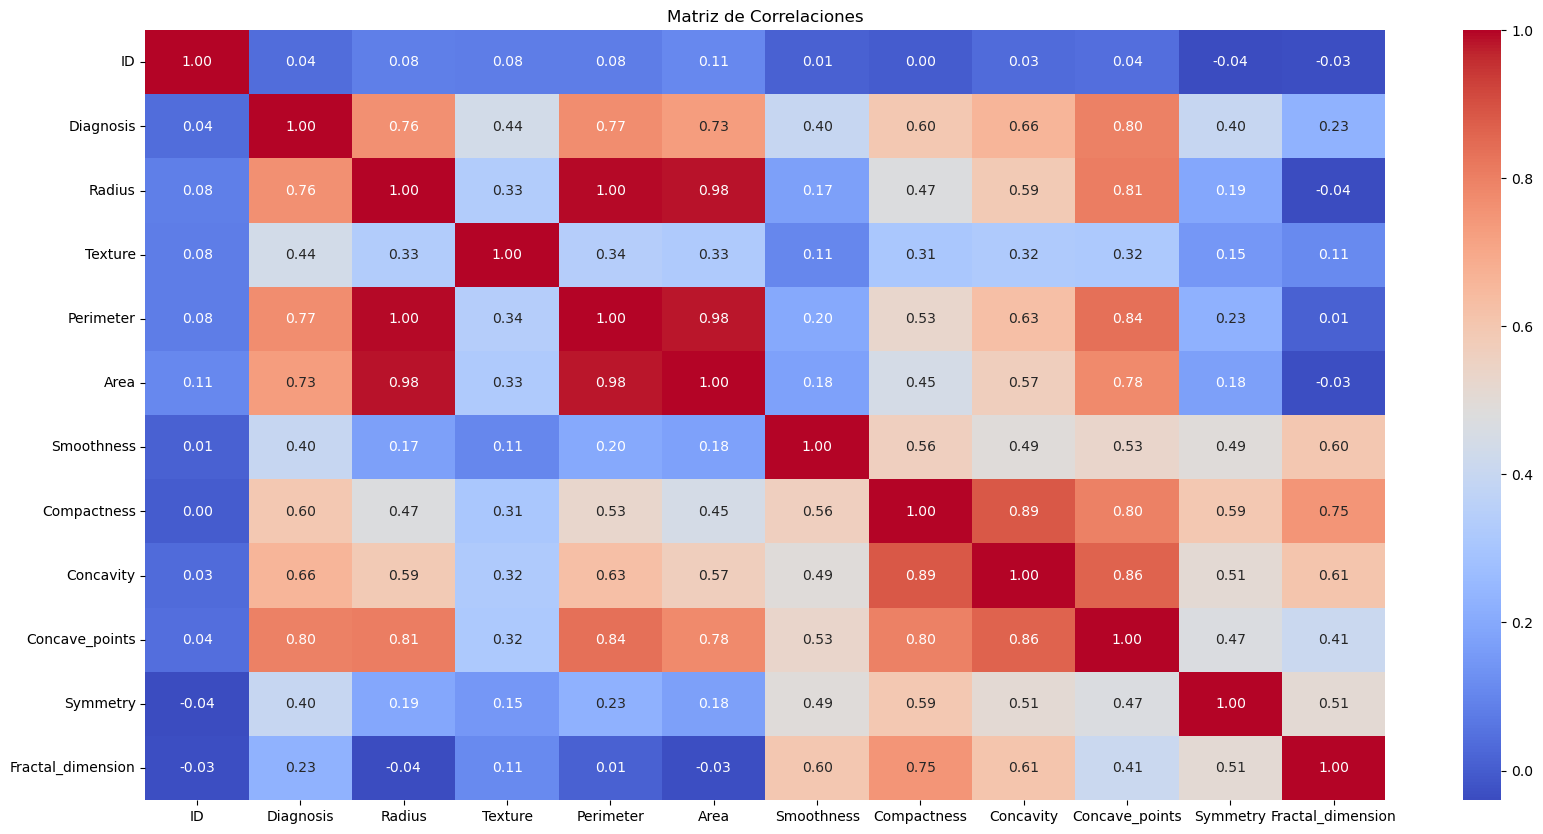

In [11]:

# Se muestran las correlaciones entre las variables
# Calcula la matriz de correlación
correlacion = df_d.corr()

# Crea un heatmap con seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlaciones")
plt.show()

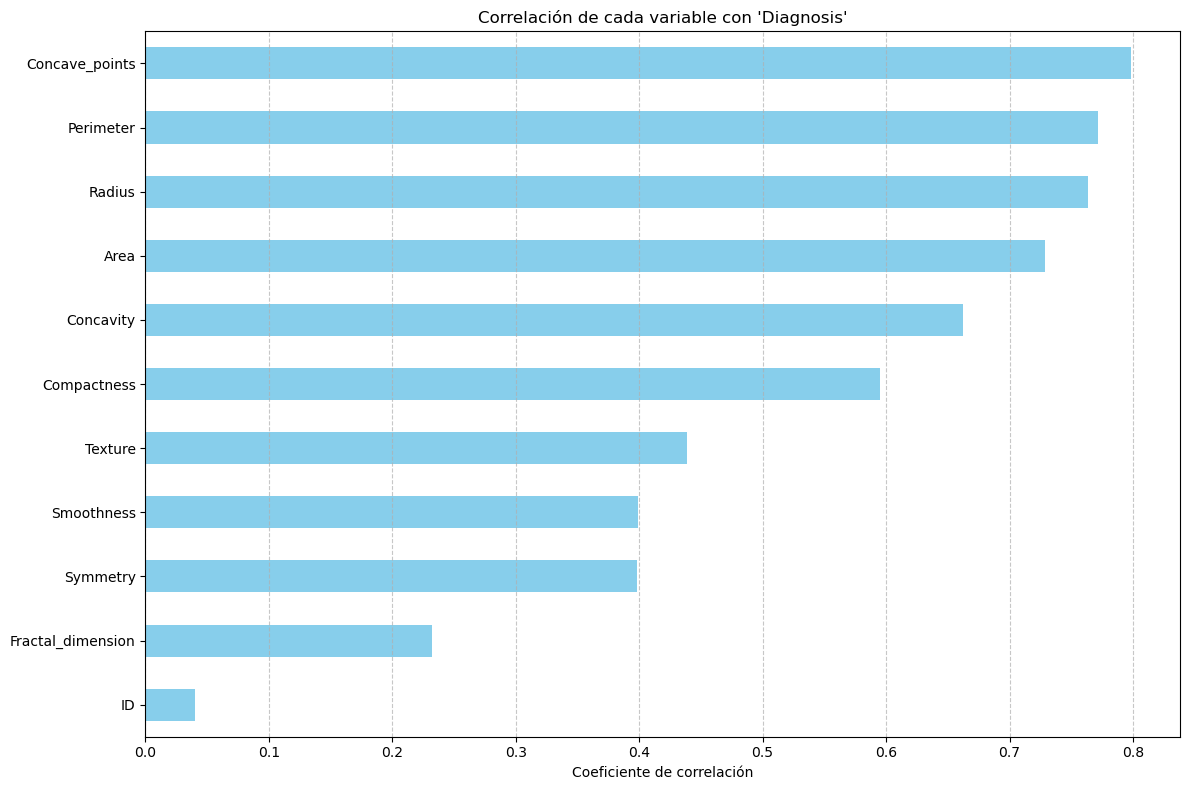

In [12]:
# Se muestran las correlaciones de las variables en específico con el Diagnóstico, ya que es la variable objetivo

# Calcula la correlación de todas las variables con 'Diagnosis'
correlaciones = df_d.corr()['Diagnosis'].drop('Diagnosis')  # eliminamos la autocorrelación

# Ordenamos de menor a mayor
correlaciones_ordenadas = correlaciones.sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
correlaciones_ordenadas.plot(kind='barh', color='skyblue')
plt.title("Correlación de cada variable con 'Diagnosis'")
plt.xlabel("Coeficiente de correlación")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Frecuencias

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\3038019310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')


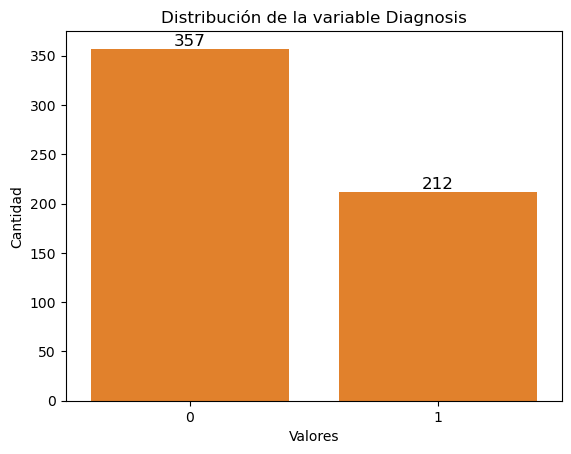

In [13]:
# Se analiza la distribución de la variable objetivo
conteo = df_d['Diagnosis'].value_counts()

ax = sns.barplot(x=conteo.index, y=conteo.values, palette='pastel')
# Agregar etiquetas en las barras
for i, value in enumerate(conteo.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

# Crear el gráfico con Seaborn
sns.barplot(x=conteo.index, y=conteo.values)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Valores')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable Diagnosis')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\1833816893.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia = temp_df.groupby(['Quartile', 'Diagnosis']).size().reset_index(name='Frecuencia')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\1833816893.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frecuencia = temp_df.groupby(['Quartile', 'Diagnosis']).size().reset_index(name='Frecuencia')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\1833816893.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

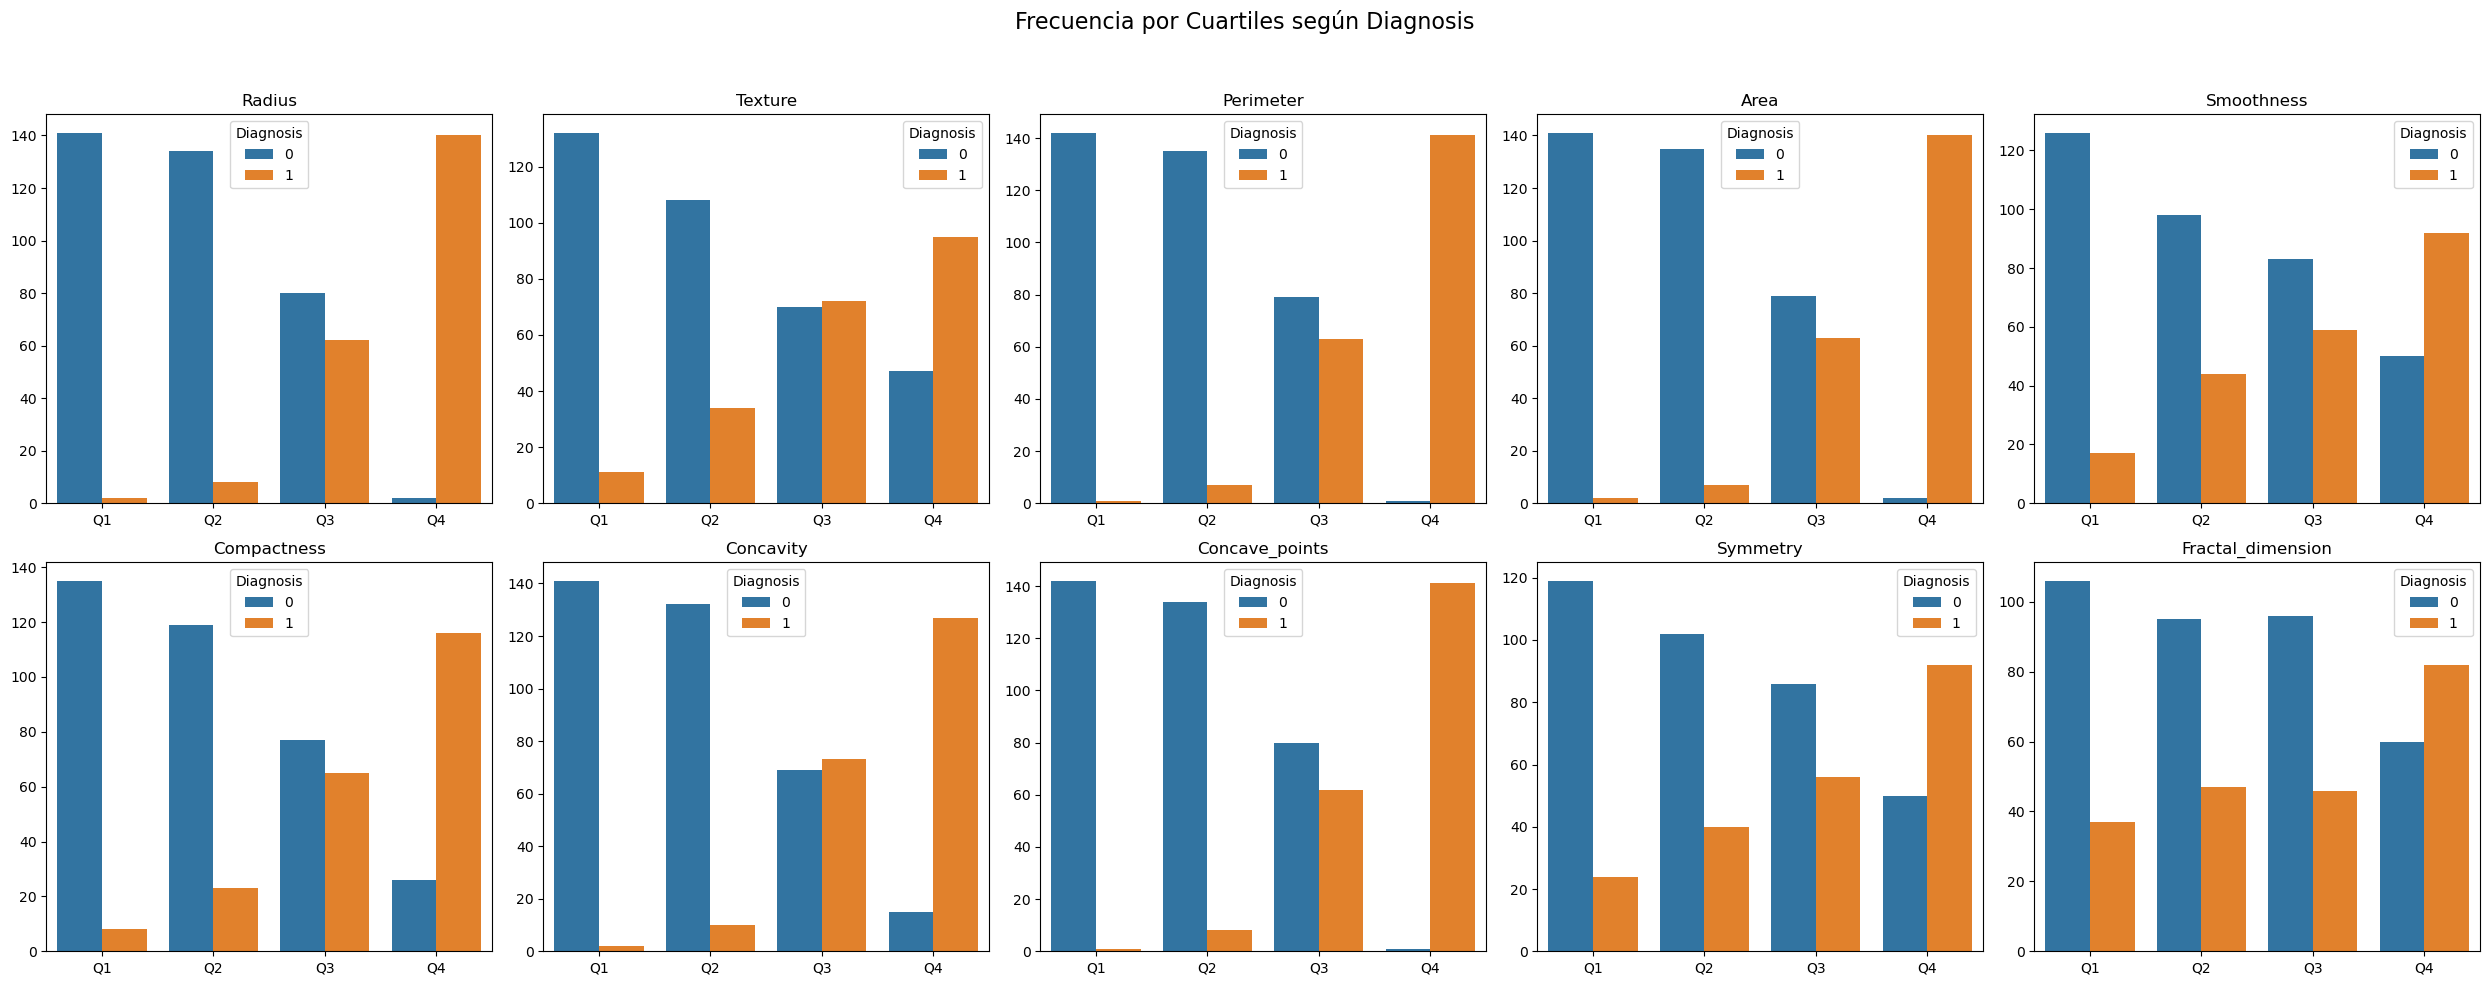

In [19]:
# Se anailiza la distribución de la variable obfjetivo en función del resto de variables

# Lista de variables a relacionar con 'Diagnosis'
variables = [
    "Radius", "Texture", "Perimeter", "Area", "Smoothness",
    "Compactness", "Concavity", "Concave_points",
    "Symmetry", "Fractal_dimension"
]

# Crear gráficos para cada variable

fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()
for i, variable in enumerate(variables):
    # Crear los cuartiles como una variable local
    cuartiles = pd.qcut(df_d[variable], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Crear una tabla de frecuencia sin modificar df_d
    temp_df = pd.DataFrame({
        'Quartile': cuartiles,
        'Diagnosis': df_d['Diagnosis']
    })
    frecuencia = temp_df.groupby(['Quartile', 'Diagnosis']).size().reset_index(name='Frecuencia')
    sns.barplot(data=frecuencia, x='Quartile', y='Frecuencia', hue='Diagnosis', ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
# Crear el gráfico con Seaborn
handles, labels = axes[0].get_legend_handles_labels()
##fig.legend(handles, labels, title='Diagnosis', loc='upper center', ncol=2)
plt.suptitle("Frecuencia por Cuartiles según Diagnosis", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio arriba para el título
plt.show()


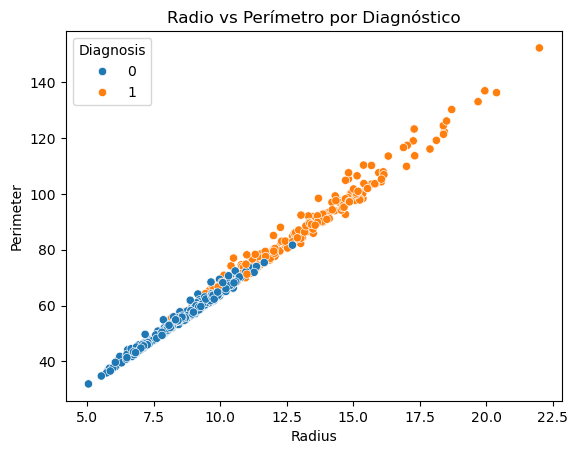

In [15]:
# Se analiza la distribución de la variable objetivo en función del tamaño del tumor (perímetro y radio)

sns.scatterplot(data=df_d, x='Radius', y='Perimeter', hue='Diagnosis')
plt.title('Radio vs Perímetro por Diagnóstico')
plt.show()

## Outliers

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\2651950167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_d, x='Diagnosis', y=variable, ax=axes[i], palette='Set2')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\2651950167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_d, x='Diagnosis', y=variable, ax=axes[i], palette='Set2')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39960\2651950167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_d, x='Diagnosis', y=variable, ax=axes[i], palette='Set2')
C

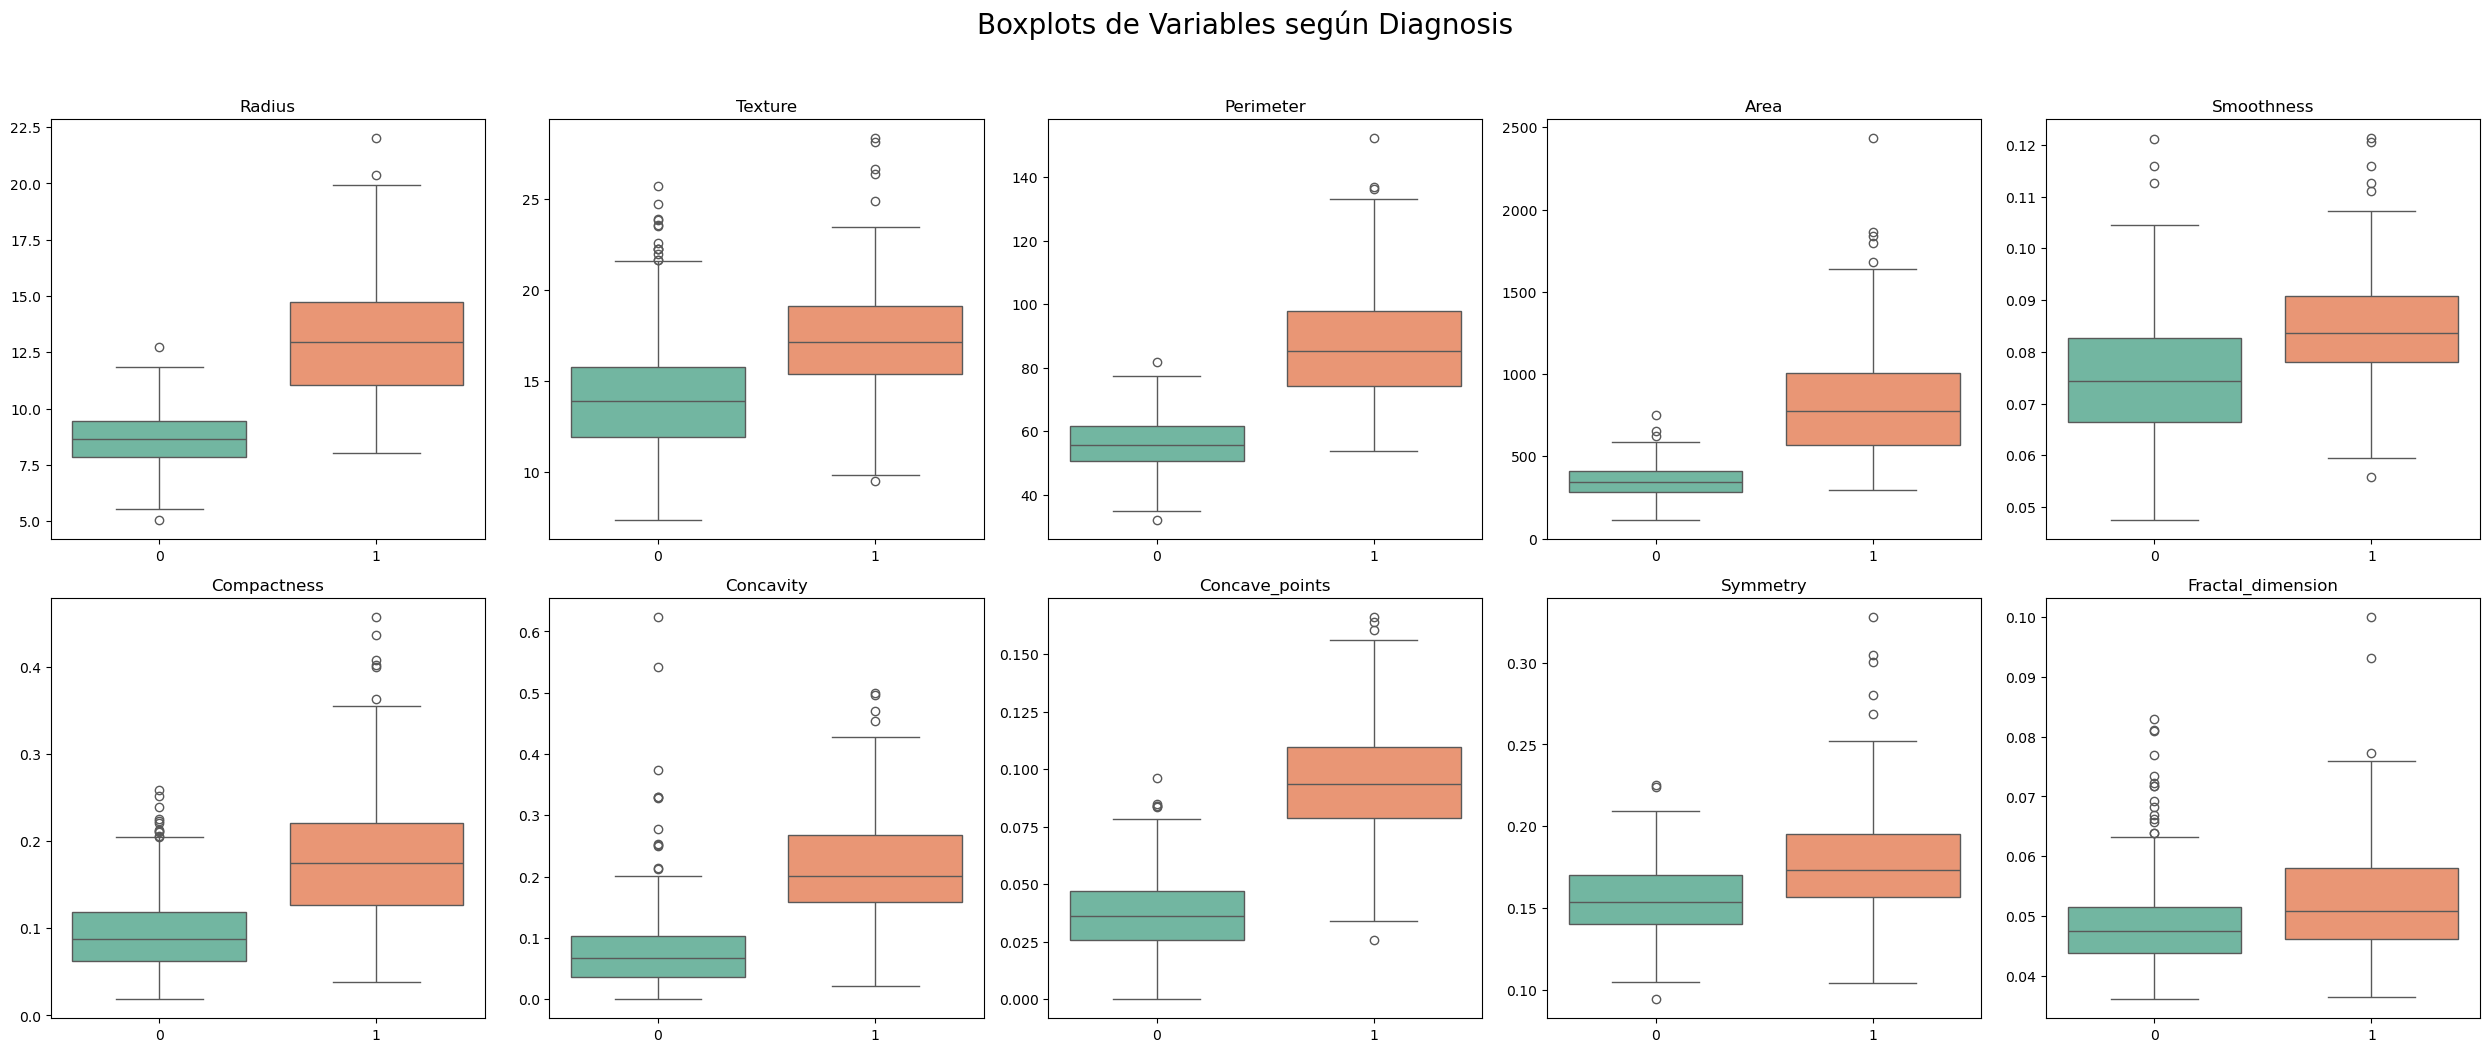

In [16]:
# Se estudia la presencia de outliers a través de boxplots

variables = [
    "Radius", "Texture", "Perimeter", "Area", "Smoothness",
    "Compactness", "Concavity", "Concave_points",
    "Symmetry", "Fractal_dimension"]

# Crear figura con subplots
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 30))
axes = axes.flatten()  # Convertir a lista para fácil iteración

# Crear un boxplot por variable
for i, variable in enumerate(variables):
    sns.boxplot(data=df_d, x='Diagnosis', y=variable, ax=axes[i], palette='Set2')
    axes[i].set_title(variable)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar subplots vacíos si sobran
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar espacio entre subplots
plt.suptitle("Boxplots de Variables según Diagnosis", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # deja espacio para el título
plt.show()


# Almacenamiento de los datos

In [ ]:
# Se guarda base de datos final en un csv
df_d.to_csv('datos_medias_cancer.csv', index=False)
